In [1]:
import numpy as np
import h5py
import matplotlib.pylab as plt
from scipy.signal import convolve2d
from scipy import stats
%matplotlib inline
import running_stats
import convolve_crop

nmecdata = h5py.File('nmecdata/flat_nmec_bin_uint8.hdf5')

im = nmecdata['FR-004-007.bin.tif'].value
orig_im = np.copy(im)
heat2d = convolve_crop.create_heatmap(im)

print "All done with "+str(im.shape)

All done with (3300, 2550)


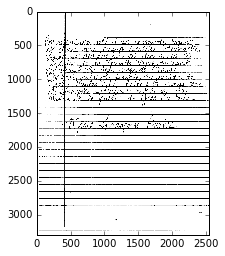

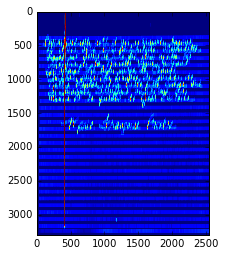

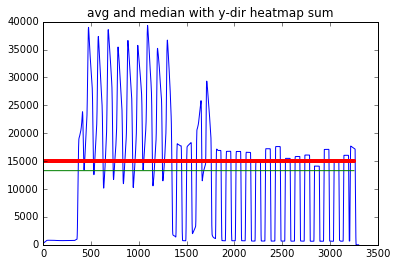

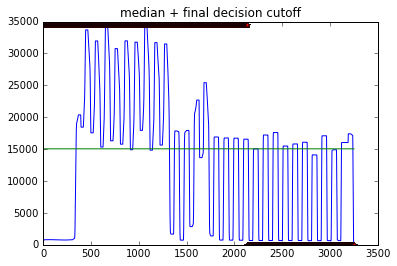

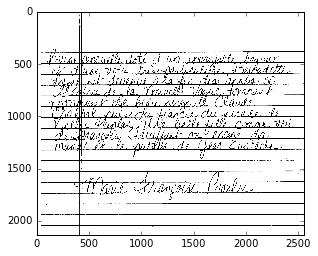

In [2]:
plt.imshow(1-im, cmap='gray')
plt.figure()
plt.imshow(heat2d)
max_raw = max(heat2d.sum(axis=1))
window_size = 50
run_med = running_stats.RunningMedian(heat2d.sum(axis=1), window_size)
run_med_max = np.zeros(len(run_med)) + max(run_med)
run_mean = running_stats.RunningMean(heat2d.sum(axis=1),len(heat2d.sum(axis=1)), window_size)
run_mean_max = np.zeros(len(run_mean)) + max(run_mean)
mean_arr = np.zeros(len(run_mean)) + np.mean(heat2d.sum(axis=1))
median_arr = np.zeros(len(run_med)) + np.median(heat2d.sum(axis=1))
#print max(run_med)
cutoff_line = np.zeros(len(run_med)) + max(run_med)
new_im, i = convolve_crop.crop_using_heatmap(orig_im, heat2d)
cutoff_line[i:len(cutoff_line)] = 0

fig, ax = plt.subplots()
ax.plot(heat2d.sum(axis=1), '-')
ax.plot(mean_arr, '-')
ax.plot(median_arr, '.')
plt.title("avg and median with y-dir heatmap sum")
plt.show()

fig, ax = plt.subplots()
ax.plot(run_med,'-')
ax.plot(median_arr, '-')
ax.plot(cutoff_line, '*')
plt.title("median + final decision cutoff")
plt.show()

plt.figure()
plt.imshow(new_im, cmap='gray')
#print "median: " + str(np.median(heat2d.sum(axis=1)))

###### 